In [1]:
import h5py
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

from rat_moseq.io import load_downsampled_rat
from rat_moseq.organization import get_mouse_h5s
from rat_moseq.plotting import plot_state_frame, format_plots
from rat_moseq.behavior import compute_changepoints
format_plots()

# Rats

## load and subsample data

In [2]:
downsampled_path = '/n/groups/datta/jlove/data/rat_seq/rat_seq_paper/analysis/downsampled_rat.h5'
downsampled = load_downsampled_rat(downsampled_path)

In [3]:
frames = downsampled[list(downsampled.keys())[0]]

In [4]:
nframes = 30*30
start = 3400
stop = start + nframes

subframes = frames[start:stop]

## get changepoints and rps

In [5]:
rat_cp, rat_proj, _ = compute_changepoints(subframes)

## get flattened frames

In [6]:
flattened = subframes.reshape(-1, subframes.shape[2]**2)
mean_flat = np.mean(flattened, axis=0)
sorting = np.argsort(mean_flat)
flattened = flattened.copy()[:, sorting]
flattened = np.flipud(flattened.T)

## get spine height

In [7]:
spine_height = subframes[:, 30:50, 25:55].reshape(-1, 30*20)
spine_height = gaussian_filter1d(spine_height, 15, axis=1).T

## plot rat stategram

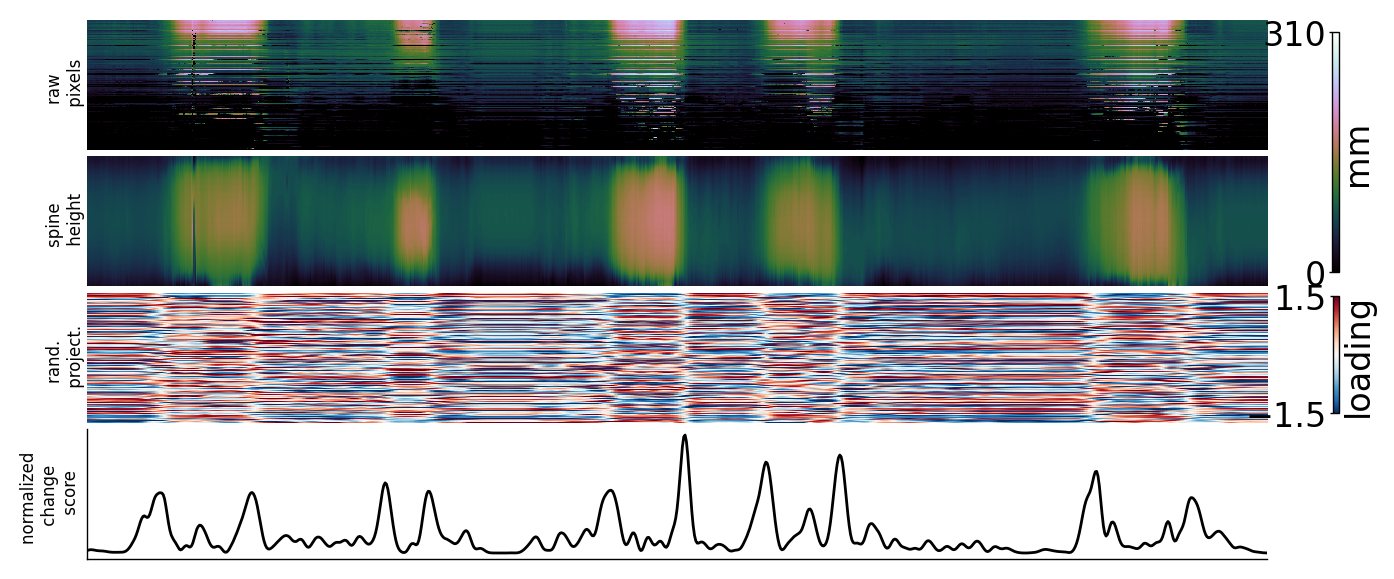

In [8]:
rat_fig, rat_ax = plot_state_frame(flattened[:1400], rat_proj.T, spine_height, rat_cp)

# Mice

## load data

In [9]:
mouse_h5s = get_mouse_h5s()
mouse_h5s = [h5 for h5 in mouse_h5s if 'saline' in str(h5)]

In [10]:
frames = h5py.File(mouse_h5s[0], 'r')['frames'][:]

## compute changepoints & flatten & get spine height

In [11]:
nframes = 30*30
start = 4500
end = start+nframes
subframes = frames[start:end]

mouse_cp, mouse_proj, _ = compute_changepoints(subframes, sig=3)
flattened = subframes.reshape(-1, subframes.shape[2]**2)
mean_flat = np.mean(flattened, axis=0)
sorting = np.argsort(mean_flat)
flattened = flattened.copy()[:, sorting]
flattened = np.flipud(flattened.T)

spine_height = subframes[:, 30:50, 25:55].reshape(-1, 30*20)
spine_height = gaussian_filter1d(spine_height, 15, axis=1).T

## plot mouse stategram

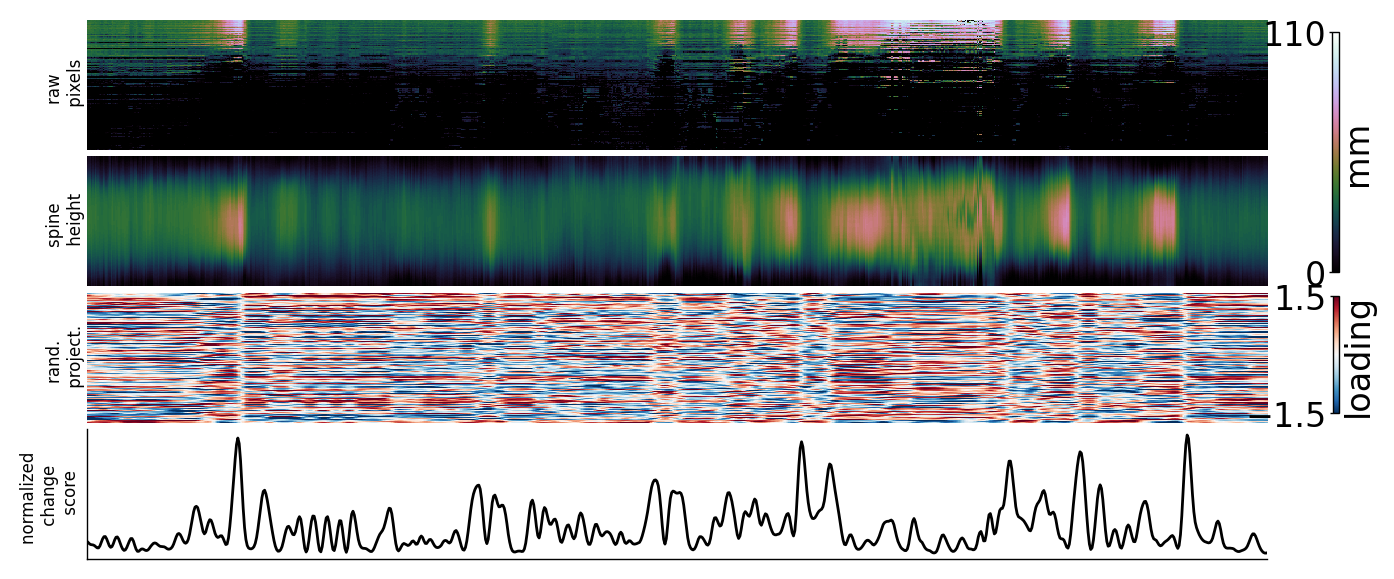

In [13]:
mouse_fig, mouse_ax = plot_state_frame(flattened[:1400], mouse_proj.T, spine_height, mouse_cp, vmax=110)